# Принятие решений в бизнесе на основе данных #

**Текущее исследование состоит из двух частей.**
1. **Задания первой части (приоритизация гипотез):**
- Необходимо применить фреймворк ICE для приоритизации гипотез и отсортировать их по убыванию приоритета.
- Необходимо применить фреймворк RICE для приоритизации гипотез и отсортировать их по убыванию приоритета.
- Необходимо указать, как изменилась приоритизация гипотез при применении RICE вместо ICE и объяснить, почему так произошло.


2. **Задания второй части (анализ А/В теста):**
- Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
- Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
- Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
- Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.
- Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.
- Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
- Построим 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
- Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
- Построим 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
- Построим статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.
- Построим статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
- Построим статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.
- Построим статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
- Примем решение по результатам теста и объясним его.

**Задачи второй части (анализ А/В теста). На основе имеющихся данных нам необходимо исследовать текущий А/В тест, и на основании имеющихся данных принять решение:**
- Остановить тест, зафиксировать победу одной из групп
- Остановить тест, зафиксировать отсутствие различий между группами
- Продолжить тест

## Приоритизация гипотез ##


In [1]:
# импортируем библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from scipy import stats as st
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
# читаем файл
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
# поменяем ширину столбца, чтобы гипотезы можно было прочесть целиком
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# для удобства приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower() 
display(data.columns)


Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [5]:
# Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
data['ice'] = data['impact'] * data['confidence'] / data['efforts']
display(round(data.sort_values(by='ice', ascending=False)))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


In [6]:
# Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
data['rice'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
display(data.sort_values(by='rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Мы наблюдаем различия между приоритизацией по фреймворкам ICE и RICE. Например, самый высокий приоритет по ICE - у восьмой гипотезы. Если же рассматривать RICE, где добавляется важный параметр - Reach, то есть какое количество пользователей затронет изменение, то ситуация меняется: на первое место выходит седьмая гипотеза с максимально возможным параметром Reach. 

## Анализ A/B-теста ##

In [7]:
# загрузим первый датасет
orders = pd.read_csv('/datasets/orders.csv', sep=',')
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [8]:
# для удобства приведем названия столбцов к нижнему регистру
orders.columns = orders.columns.str.lower() 
display(orders.columns)

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [9]:
# посмотрим на типы данных и при надобности их поменяем
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
# меняем тип данных
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
# так как идентификаторы заказа уникальны, на всякий случай убедимся, что в них нет дубликатов
orders['transactionid'].duplicated().sum()

0

In [12]:
# откроем второй датасет
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
display(visitors)

# сразу поменяем тип данных
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Важнейшим условием корректного А/В тестирования является разделение на группы одинаково размера. Нам необходимо проверить, что в нашем случае выборки равны. 

In [14]:
# проверим выборки
print ('Количество посещений в группе А -', visitors.query('group == "A"')['visitors'].sum())
print ('Количество посещений в группе B -',visitors.query('group == "B"')['visitors'].sum())
print('-----------------------------------')
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0])
print ('Количество заказов в группе B -',orders.query('group == "B"').shape[0])

Количество посещений в группе А - 18736
Количество посещений в группе B - 18916
-----------------------------------
Количество заказов в группе А - 557
Количество заказов в группе B - 640


А вот и проблема! Группы не совпадают, нас в данном случае интересует количество посещений. Возможно, одни и те же пользователи случайно попали в обе группы, тогда нужно будет что-то с этим сделать.

In [15]:
# создадим переменные, в которые положим айди пользователей в каждой группе
visitorsA = orders[orders['group']=='A']['visitorid']
visitorsB = orders[orders['group']=='B']['visitorid']

# а теперь посмотрим, есть ли одни и те же пользователи, которые попали в обе группы сразу
visitors_AB = orders.loc[orders['visitorid'].isin(visitorsA)& orders['visitorid'].isin(visitorsB),'visitorid'].unique()
print(len(visitors_AB))

58


Получилось 58 счастливчиков! Думаем, разумнее всего будет просто удалить эти айди из обеих выборок. 

In [16]:
print((orders.groupby('visitorid')['group'].nunique()>1).count())

1031


In [17]:
orders = orders.query("visitorid not in @visitors_AB")
print((orders.groupby('visitorid')['group'].nunique()>1).count())

973


Если из 1031 вычесть 973, то получатся те самые 58 пользователей. 

Разницу в количестве заказов считать не будем, потому что это нормальная ситуация. Можно приступать к анализу. 

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group']\
                                    == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', \
                                    'visitorid': 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                                    visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', \
                                    'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

display(ordersAggregated)
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


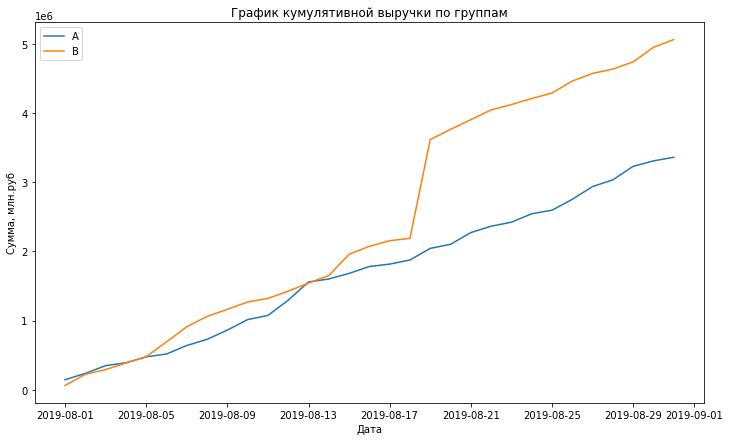

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,7))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

plt.xlabel('Дата')
plt.ylabel('Сумма, млн.руб')
plt.title('График кумулятивной выручки по группам')
plt.show()

Группа А растет линейно, а вот у В наблюдается выброс 17 августа. Тем не менее, у группы В показатели лучше. 

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

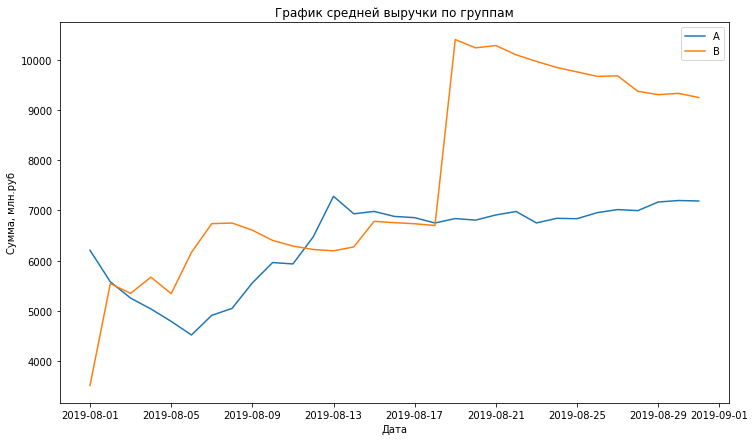

In [20]:
# построим графики среднего чека по группам 
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

plt.xlabel('Дата')
plt.ylabel('Сумма, млн.руб')
plt.title('График средней выручки по группам')
plt.show()

Тут мы видим тот же самый всплеск в группе В 17 августа - видимо, в этот день был сделан довольно крупный заказ. Потом В делает отскок, по которому мы, опять же, можем судить, что это была аномалия. 

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения. ###

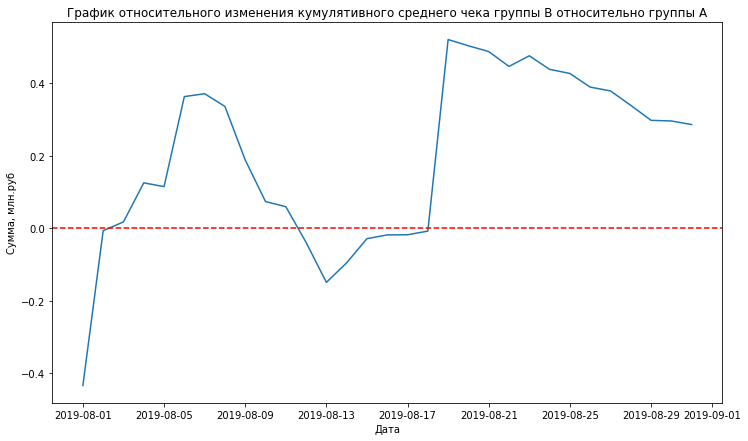

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',\
                                                                                                suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, \
         label="Относительное изменение кумулятивного среднего чека группы B относительно группы A")
# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Сумма, млн.руб')
plt.title('График относительного изменения кумулятивного среднего чека группы B относительно группы A')
plt.show()

График относительного изменения кумулятивного среднего чека подтверждает наши выводы: у группы В он выше. 

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения. ###

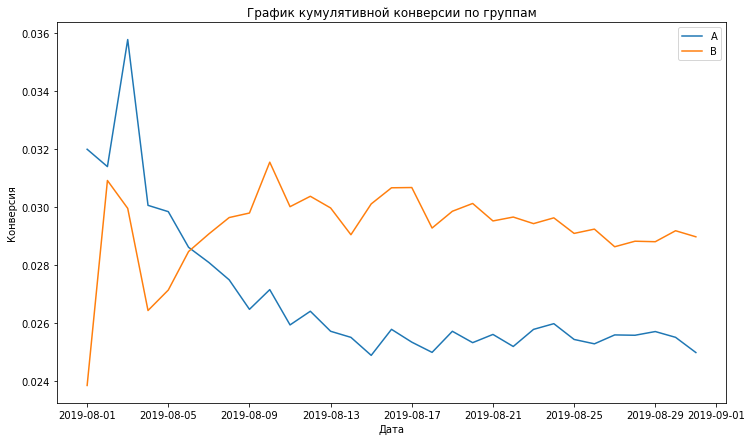

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.show()

Конверсия почти симметрична - знак хороший. На первых этапах можем наблюдать существенный разброс конвекрсий разных групп, однако, потом график приходит в условную норму. Судя по графику, группа В лидирует. 

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения. ###

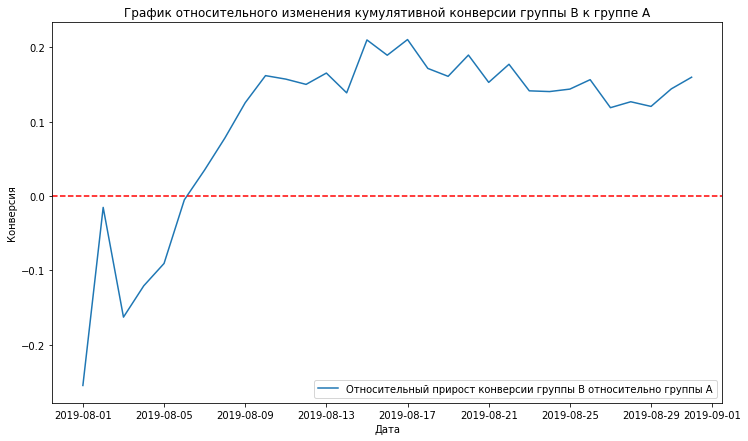

In [23]:
# сначала сделаем табличку со значениями с накоплением
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],\
                                                  left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions\
                                    ['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

Опять же, в разрезе конверсии мы видим, что в какие-то моменты различие между группами В и А становится существенным. Вспомним, что у нас абсолютно точно где-то есть заказы с аномальной стоимостью, которые в какой-то момент увеличили кумулятивную конверсию - тем не менее, лидирует все равно группа В. 

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения. ###

In [24]:
# строим табличку, в которой каждому юзеру будет соответствовать количесмтво заказов
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['user', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(20)) 

,user,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


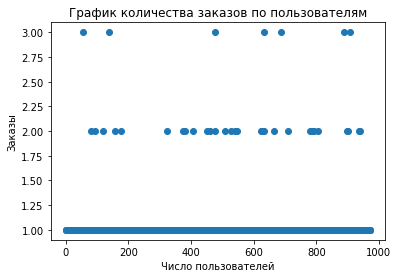

In [25]:
# строим график, где наглядно увидим число заказов для пользователей
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('Число пользователей')
plt.ylabel('Заказы')
plt.title('График количества заказов по пользователям')
plt.show()

Как мы и видим, количество заказов изредка достигает даже двух (тем не менее, возможно, их стоит принять во внимание).

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей. ### 

In [26]:
print('95 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [99]))) 

95 перцентиль: 1.00
99 перцентиль: 2.00


Не более 5 процентов юзеров делали больше 1 заказа, и не более одного процента делали заказы более 2 раз. Значит, нас будут интересовать пользователи, которые сделали не более 2 заказов. 

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения. ###

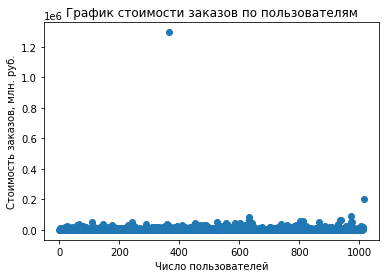

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Число пользователей')
plt.ylabel('Стоимость заказов, млн. руб.')
plt.title('График стоимости заказов по пользователям')
plt.show()

Тут мы видим какой-то совсем уж крупный заказ стоимостью 1.2 млн, но там такого не надо :) От таких выбросов надо избавляться. 

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов. ###

In [28]:
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль: 26785.00
99 перцентиль: 53904.00



Впоследствии можно задать 54000 рублей самой высокой точкой стоимости заказа, чтобы выбросы не портили нам расчеты. 

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения. ###

In [29]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userid', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['user', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['user', 'orders'] 

Далее подготовим выборки к проверке критерием Манна-Уитни: объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [30]:
# так как нам предстоит рассчитать неочищенные данные, сделаем переменные с соответствующей пометкой
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum()\
                     - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum()\
                     - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [31]:
# проверим гипотезы:
# H0 - конверсия группы А = конверсии группы В
# H1 - конверсии групп не равны
#alpha = 0.05
print("p_value:{}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

p_value:0.011018084110014696


***В данном случае p-value у нас меньше
, чем значение alpha, что дает нам основания отвергнуть нулевую гипотезу о том, что конверсии в группах А и В равны - значит, в нашем случае различие оказалось статистически значимым. Рассчитаем также средние значения конверсий в группах А и В для наглядности.***

In [32]:
# выводим среднее значение конверсии в каждой группе
print('Средняя конверсия группы А:',sampleA.mean())
print('Средняя конверсия группы B:', sampleB.mean())

# рассчитаем прирост средней конверсии В относительно конверсии А
print("Прирост средней конверсии группы В относительно группы А: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Средняя конверсия группы А: 0.02497865072587532
Средняя конверсия группы B: 0.02897018397124128
Прирост средней конверсии группы В относительно группы А: 0.160


Конверсия группы В значительно больше, значит статистическая значимость в различии между выборками присутствует, в данном случае средняя конверсия группы В выше, чем средняя конверсия группы А на 16%. 

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения. ###

In [33]:
# воспользуемся критерием Манна-Уитни для проверки гипотез
# H0 - средний чек группы А = среднему чеку группы В
# H1 - средние чеки групп не равны
#alpha = 0.05
print('p_value:{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                               orders[orders['group']=='B']['revenue'])[1]))

p_value:0.829


***P_value больше alpha, значит, у нас не получится отвергнуть нулевую гипотезу о том, что средний чек группы А = среднему чеку группы В.***

In [34]:
# выведем средний чек в каждой группе
print('Средний чек группы А: {:.3f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()))
                                             
# выведем относительный прирост среднего чека группы B
print("Относительный прирост среднего чека группы B: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean() \
                                                            /orders[orders['group']=='A']['revenue'].mean()-1))

Средний чек группы А: 7189.436
Средний чек группы B: 9249.949
Относительный прирост среднего чека группы B: 0.287


Относительный прирост среднего чека в группе В (по сырым данным) больше, чем в группе А, хотя критерий Манна-Уитни не дает нам отвергнуть нулевую гипотезу, согласно которой средний чек группы А равен среднему чеку группе В. Видимо, данные различия не могут быть признаны статистически значимыми. 

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения. ###

In [35]:
# сначала отсеем пользователей, которые заказали слишком много заказов
users_many_orders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['user'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['user']], axis = 0)


users_expensive_orders = orders[orders['revenue'] > 54000]['visitorid']

# вынесем эти айди в отдельную табличку
outstanding_users = pd.concat([users_many_orders, users_expensive_orders], axis = 0).drop_duplicates().sort_values()


In [36]:
# сделаем переменную с отфильтрованными значениями
filtered_sampleA = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user'].isin(outstanding_users))]\
                  ['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors']\
                  .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0) 

filtered_sampleB = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user'].isin(outstanding_users))]\
                  ['orders'], pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors']\
                  .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [37]:
# посмотрим на разницу длине переменных, чтобы убедиться, что после фильтрации она сократилась
print(len(sampleA))
print(len(filtered_sampleA))

18736
18726


In [38]:
# посмотрим на разницу в длине кортежей B, чтобы убедиться, что после фильтрации она сократилась
print(len(sampleB))
print(len(filtered_sampleB))

18916
18910


Длина после фильтрации уменьшилась - это хороший знак! Значит, можно приступать к работе с очищенными данными. 

**Теперь подсчитаем конверсию по очищенным данным.**

In [39]:
# проверим гипотезы:
# H0 - конверсия группы А = конверсии группы В
# H1 - конверсии групп не равны
#alpha = 0.05
print("p_value: {0:.3f}".format(st.mannwhitneyu(filtered_sampleA, filtered_sampleB)[1]))

p_value: 0.007


***p_value меньше alpha, нулевую гипотезу о том, что конверсия по очищенным данным равна, можем отвергнуть.***

In [40]:
# выводим среднее значение конверсии в каждой группе
print('Средняя конверсия группы А:', filtered_sampleA.mean())
print('Средняя конверсия группы B:', filtered_sampleB.mean())

# рассчитаем прирост средней конверсии В относительно конверсии А
print("Прирост средней конверсии группы В относительно группы А: {0:.3f}".format(filtered_sampleB.mean() \
                                                                 / filtered_sampleA.mean() - 1))

Средняя конверсия группы А: 0.023923955997009506
Средняя конверсия группы B: 0.02845055526176626
Прирост средней конверсии группы В относительно группы А: 0.189


А теперь вспомним, какие значения конверсии у нас были в **сырых** данных:

In [41]:
# выводим среднее значение конверсии в каждой группе по сырым данным
print('Средняя конверсия группы А по сырым данным:',sampleA.mean())
print('Средняя конверсия группы B по сырым данным:', sampleB.mean())

# рассчитаем прирост средней конверсии В относительно конверсии А по сырым данным
print("Прирост средней конверсии группы В относительно группы А по сырым данным: {0:.3f}".format \
                                                 (sampleB.mean() / sampleA.mean() - 1))

Средняя конверсия группы А по сырым данным: 0.02497865072587532
Средняя конверсия группы B по сырым данным: 0.02897018397124128
Прирост средней конверсии группы В относительно группы А по сырым данным: 0.160


Судя по очищенным данным, абсолютное числовое выражение средних  конверсий в группах А и В по очищенным данным немного меньше, чем у сырых данных - тем не менее, прирост больше. 

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения. ###

In [42]:
# воспользуемся критерием Манна-Уитни для проверки гипотез
# H0 - средний чек группы А = среднему чеку группы В
# H1 - средние чеки групп не равны
#alpha = 0.05
print(
    "p_value: {0:.3f}".format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(outstanding_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(outstanding_users)),
                )
            ]['revenue'],
        )[1]
    )
)

p_value: 0.788


***p_value больше значения alpha, из этого следует, что нулевую гипотезу о равенстве средних чеков в разных группах мы отвергнуть не можем***

In [43]:
# выведем средний чек в каждой группе
# в группе А
print(
    "Средний чек группы A: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(outstanding_users)),
            )
        ]['revenue'].mean()))

# в группе В
print(
    "Средний чек группы B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(outstanding_users)),
            )
        ]['revenue'].mean()))

print(
    "Относительный прирост среднего чека группы B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(outstanding_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(outstanding_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Средний чек группы A: 6487.025
Средний чек группы B: 6277.266
Относительный прирост среднего чека группы B: -0.032


А теперь вспомним, какие значения конверсии у нас были в **сырых** данных:

In [44]:
# выведем средний чек в каждой группе по сырым данным
print('Средний чек группы А по сырым данным: {:.3f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B по сырым данным: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()))
                                             
# выведем относительный прирост среднего чека группы B по сырым данным
print("Относительный прирост среднего чека группы В по сырым данным: {0:.3f}".format(orders[orders['group']=='B']\
                                    ['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Средний чек группы А по сырым данным: 7189.436
Средний чек группы B по сырым данным: 9249.949
Относительный прирост среднего чека группы В по сырым данным: 0.287


### Примите решение по результатам теста и объясните его. ###

**Варианты решений**:
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**Итак, сначала сравним сырые данные:**
- Если рассматривать ***конверсию***, p-value у нас меньше, чем значение alpha, что дает нам основания отвергнуть нулевую гипотезу о том, что конверсии в группах А и В равны - значит, в нашем случае различие оказалось статистически значимым. 
 - Как мы рассчитали выше, прирост средней конверсии группы В относительно группы А равен 0.160, то есть 16%. 



- Если рассматривать ***средний чек***, то p_value больше alpha, соответственно, нулевую гипотезу о равенстве средних чеков в разных группах мы отвергнуть не можем. Тем не менее, относительный прирост среднего чека в группе В (по сырым данным 0.287, то есть на 28%) - больше, чем в группе А, хотя критерий Манна-Уитни не дает нам отвергнуть нулевую гипотезу. Видимо, данные различия не могут быть признаны статистически значимыми. 

**Касаемо очищенных данных:**
- Если рассматривать ***конверсию***, то p_value меньше alpha, соответственно, нулевую гипотезу о том, что конверсия по очищенным данным равна, можем отвергнуть. Значит, различия являются статистически значимыми. Умозаключения соответствуют выводам по сырым данным. 
 - Если рассматривать немного подробнее (а именно ***относительный прирост***), то по очищенным данным прирост средней конверсии в группе В на почти на 19% больше группы А.

- Если рассматривать ***средний чек***, то p_value больше alpha, соответственно, нулевую гипотезу о равенстве средних чеков в разных группах мы отвергнуть не можем - тот же вывод, который мы сделали, основываясь на сырых данных.
 - Если рассматривать немного подробнее (а именно ***относительный прирост***), то по очищенным данным прирост средней конверсии в группе В на почти на 3% меньше группы А.

**Вывод:**
считаем целесообразным продолжить проведение А/В теста до исчерпывания отведенного бюджета/времени на тест. Текущая информация не позволяет сделать однозначный вывод о превосходстве одной группы над другой. 